# **PageRank (Link dlm Page)**

In [3]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from IPython.display import display
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
nama_file = '/content/drive/MyDrive/PPW/output/cnnindonesia_links1.csv'
data_page = pd.read_csv(nama_file)

In [5]:
display(data_page)

,id_berita,page,link_keluar
0,1,https://www.cnnindonesia.com/indeks?page=1,https://www.cnnindonesia.com/nasional/20250911...
1,2,https://www.cnnindonesia.com/indeks?page=1,https://www.cnnindonesia.com/olahraga/20250911...
2,3,https://www.cnnindonesia.com/indeks?page=1,https://www.cnnindonesia.com/internasional/202...
3,4,https://www.cnnindonesia.com/indeks?page=1,https://www.cnnindonesia.com/olahraga/20250910...
4,5,https://www.cnnindonesia.com/indeks?page=1,https://www.cnnindonesia.com/gaya-hidup/202509...
...,...,...,...
995,996,https://www.cnnindonesia.com/indeks?page=100,https://www.cnnindonesia.com/internasional/202...
996,997,https://www.cnnindonesia.com/indeks?page=100,https://www.cnnindonesia.com/olahraga/20250907...
997,998,https://www.cnnindonesia.com/indeks?page=100,https://www.cnnindonesia.com/nasional/20250907...
998,999,https://www.cnnindonesia.com/indeks?page=100,https://www.cnnindonesia.com/internasional/202...


# **Membangun Graph Menggunakan NetworkX**

In [6]:
graph = nx.DiGraph()
edge = list(zip(data_page['page'], data_page['link_keluar']))
graph.add_edges_from(edge)

print(f"Jumlah node (page unik): {graph.number_of_nodes()}")
print(f"Jumlah edge (tautan): {graph.number_of_edges()}")

Jumlah node (page unik): 1076
Jumlah edge (tautan): 1000


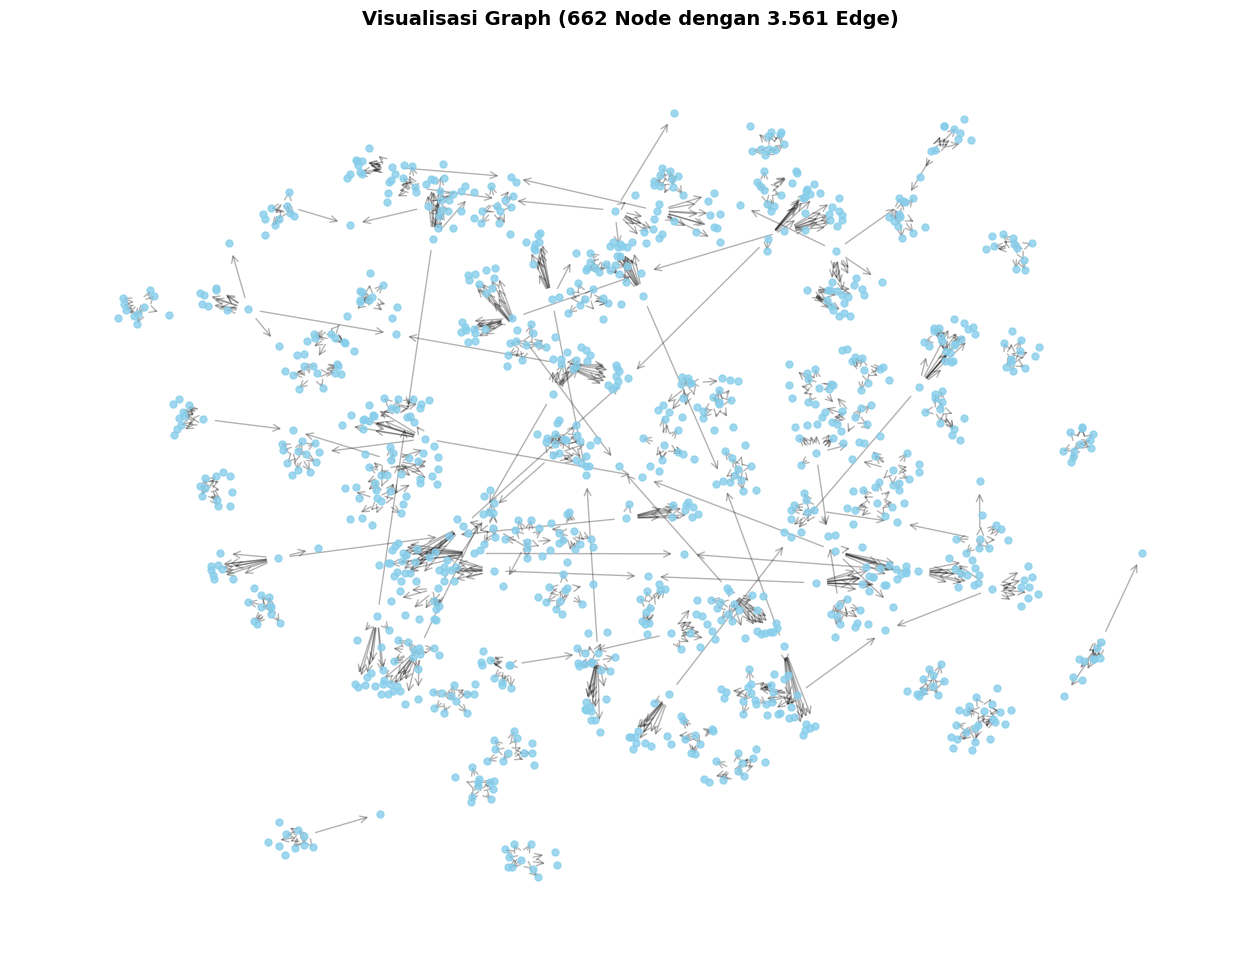

In [7]:
# Visualisasi Graph
plt.figure(figsize=(16, 12))
plt.title("Visualisasi Graph (662 Node dengan 3.561 Edge)", fontsize=14, fontweight='bold')

# layout efisien untuk dataset besar
pos = nx.spring_layout(graph, seed=42, k=0.15, iterations=20)

# gambar node dan edge
nx.draw_networkx_nodes(graph, pos, node_color='skyblue', node_size=25, alpha=0.8)
# nx.draw_networkx_edges(graph, pos, edge_color='black', arrows=False, alpha=0.3)
nx.draw_networkx_edges(graph, pos, edge_color='black', arrowstyle='->', arrowsize=12, alpha=0.3)

# label, bisa ditampilkan (resiko visualisasi ga jelas karena link panjang). aktifkan :
# nx.draw_networkx_labels(graph, pos, font_size=6, font_color='black')

plt.axis('off')
plt.show()

# **Membentuk Matriks Adjacency**

In [8]:
# note: all matriks berukuran 662 x 662, sangat besar untuk ditampilkan
# jadi ditampilkan sebagian (misalnya 30x30)
page = list(graph.nodes())[:30]
A = nx.to_numpy_array(graph, nodelist=page, dtype=int)

data_page_A = pd.DataFrame(A, index=page, columns=page)
print("Matriks Adjacency (A) [30x30]:")
display(data_page_A)

Matriks Adjacency (A) [30x30]:


,https://www.cnnindonesia.com/indeks?page=1,https://www.cnnindonesia.com/nasional/20250911003943-20-1272349/israel-bom-markas-komando-di-ibu-kota-yaman-35-tewas-118-terluka,https://www.cnnindonesia.com/olahraga/20250911003024-142-1272347/dorong-suporter-andre-onana-dilempar-botol,https://www.cnnindonesia.com/internasional/20250911000640-113-1272346/militer-nepal-batasi-aktivitas-pascademo-gulingkan-rezim-pemerintahan,https://www.cnnindonesia.com/olahraga/20250910132305-156-1272112/dua-helikopter-disiagakan-selama-motogp-mandalika-2025,https://www.cnnindonesia.com/gaya-hidup/20250910173621-307-1272253/lari-rahasia-hidup-sehat-untuk-tingkatkan-produktivitas-kerja,https://www.cnnindonesia.com/nasional/20250910233117-20-1272345/lokasi-titik-jatuh-helikopter-di-mimika-ditemukan-evakuasi-besok-pagi,https://www.cnnindonesia.com/nasional/20250910204244-22-1272312/foto-porak-poranda-denpasar-diterjang-banjir,https://www.cnnindonesia.com/olahraga/20250910230634-142-1272344/hokky-caraka-minta-maaf-usai-timnas-u-23-gagal-ke-piala-asia,https://www.cnnindonesia.com/tv/20250910215612-404-1272331/video-kapal-misi-kemanusiaan-untuk-gaza-diserang-drone,...,https://www.cnnindonesia.com/olahraga/20250910165232-142-1272234/timnas-futsal-indonesia-siap-tumpas-denmark-di-final-cfa,https://www.cnnindonesia.com/nasional/20250910205010-22-1272320/foto-aksi-damai-aliansi-ibu-indonesia-desak-aparat-bebaskan-pelajar,https://www.cnnindonesia.com/indeks?page=3,https://www.cnnindonesia.com/internasional/20250910191327-106-1272284/pratikno-pamer-asta-cita-prabowo-di-asean-human-development-conference,https://www.cnnindonesia.com/ekonomi/20250910203054-625-1272307/pln-epi-genjot-ekosistem-biomassa-demi-target-3-juta-ton-di-2025,https://www.cnnindonesia.com/ekonomi/20250910131832-532-1272109/apa-warisan-penting-sri-mulyani-selama-jadi-menteri-keuangan,https://www.cnnindonesia.com/olahraga/20250910203123-170-1272308/kesan-mohammad-ahsan-dan-vito-usai-masuk-hall-of-fame-pb-djarum,https://www.cnnindonesia.com/hiburan/20250910111035-220-1272052/selain-indonesia-ini-negara-asia-yang-sudah-ajukan-film-ke-oscar-2026,https://www.cnnindonesia.com/internasional/20250910201733-106-1272304/prabowo-telepon-emir-qatar-tanya-kondisi-usai-doha-diserang-israel,https://www.cnnindonesia.com/ekonomi/20250910204701-532-1272319/prabowo-setujui-ide-menkeu-tarik-rp200-t-uang-pemerintah-di-bi
https://www.cnnindonesia.com/indeks?page=1,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
https://www.cnnindonesia.com/nasional/20250911003943-20-1272349/israel-bom-markas-komando-di-ibu-kota-yaman-35-tewas-118-terluka,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://www.cnnindonesia.com/olahraga/20250911003024-142-1272347/dorong-suporter-andre-onana-dilempar-botol,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://www.cnnindonesia.com/internasional/20250911000640-113-1272346/militer-nepal-batasi-aktivitas-pascademo-gulingkan-rezim-pemerintahan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://www.cnnindonesia.com/olahraga/20250910132305-156-1272112/dua-helikopter-disiagakan-selama-motogp-mandalika-2025,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://www.cnnindonesia.com/gaya-hidup/20250910173621-307-1272253/lari-rahasia-hidup-sehat-untuk-tingkatkan-produktivitas-kerja,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://www.cnnindonesia.com/nasional/20250910233117-20-1272345/lokasi-titik-jatuh-helikopter-di-mimika-ditemukan-evakuasi-besok-pagi,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://www.cnnindonesia.com/nasional/20250910204244-22-1272312/foto-porak-poranda-denpasar-diterjang-banjir,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://www.cnnindonesia.com/olahraga/20250910230634-142-1272344/hokky-caraka-minta-maaf-usai-timnas-u-23-gagal-ke-piala-asia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://www.cnnindonesia.com/tv/20250910215612-404-1272331/video-kapal-misi-kemanusiaan-untuk-gaza-diserang-drone,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# **Membentuk Matriks Probabilitas Transisi Baris-Stokastik**

In [9]:
adj_full = nx.to_numpy_array(graph, dtype=float)
n = adj_full.shape[0]

# tangani dangling node (page tanpa link_keluar)
out_degree = adj_full.sum(axis=1)
for i in range(n):
    if out_degree[i] == 0:
        adj_full[i, :] = 1.0

# matriks transisi baris-stokastik
P = adj_full / adj_full.sum(axis=1, keepdims=True)

# tampilan sebagian matriks P
data_page_P = pd.DataFrame(P[:30, :30], columns=range(30), index=range(30))
print("Matriks Transisi (P) [30x30]:")
display(data_page_P)

Matriks Transisi (P) [30x30]:


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.000000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,...,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929
2,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,...,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929
3,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,...,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929
4,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,...,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929
5,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,...,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929
6,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,...,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929
7,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,...,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929
8,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,...,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929
9,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,...,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929


# **Membentuk Matriks Kolom-Stokastik**

In [10]:
# M = Pᵀ (kolom-stokastik)
M = P.T
data_page_M = pd.DataFrame(M[:30, :30], columns=range(30), index=range(30))
print("Matriks M = Pᵀ [30x30]:")
display(data_page_M)

Matriks M = Pᵀ [30x30]:


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.0,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,...,0.000929,0.000929,0.0,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929
1,0.1,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,...,0.000929,0.000929,0.0,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929
2,0.1,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,...,0.000929,0.000929,0.0,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929
3,0.1,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,...,0.000929,0.000929,0.0,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929
4,0.1,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,...,0.000929,0.000929,0.0,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929
5,0.1,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,...,0.000929,0.000929,0.0,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929
6,0.1,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,...,0.000929,0.000929,0.0,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929
7,0.1,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,...,0.000929,0.000929,0.0,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929
8,0.1,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,...,0.000929,0.000929,0.0,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929
9,0.1,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,...,0.000929,0.000929,0.0,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929


# **Menghitung PageRank Iteratif (Manual)**

In [11]:
def pagerank_iteratif(M, pagelist, d=0.85, max_iter=100, tol=1e-6):
    n = M.shape[0]
    r = np.ones(n) / n
    teleport = (1 - d) / n

    for i in range(max_iter):
        r_new = d * M @ r + teleport
        # debugging aja
        indeks_top_page = np.argmax(r_new)  # indeks page dengan PageRank tertinggi
        top_page = pagelist[indeks_top_page] # page dengan score pagerank tertinggi
        print(f"Iterasi {i+1}: Page {top_page} dengan PageRank {r_new[indeks_top_page]:.6f}")
        if np.linalg.norm(r_new - r, 1) < tol:
            # debugging aja
            print(f"Konvergen setelah {i+1} iterasi")
            break
        r = r_new
    return r

print("Menghitung PageRank:")

urutan_page = list(graph.nodes())
r = pagerank_iteratif(M, pagelist=urutan_page, d=0.85, max_iter=100, tol=1e-6)

Menghitung PageRank:
Iterasi 1: Page https://www.cnnindonesia.com/olahraga/20250909220106-142-1271863/kata-kata-gerald-vanenburg-usai-indonesia-gagal-ke-piala-asia-u-23 dengan PageRank 0.001014
Iterasi 2: Page https://www.cnnindonesia.com/ekonomi/20250909194016-92-1271824/kkp-kasus-udang-ri-tercemar-radioaktif-hanya-terjadi-di-1-pengiriman dengan PageRank 0.001007
Iterasi 3: Page https://www.cnnindonesia.com/nasional/20250910205010-22-1272320/foto-aksi-damai-aliansi-ibu-indonesia-desak-aparat-bebaskan-pelajar dengan PageRank 0.001008
Iterasi 4: Page https://www.cnnindonesia.com/internasional/20250910170143-134-1272271/warga-as-demo-pro-palestina-di-depan-resto-tempat-trump-makan dengan PageRank 0.001008
Iterasi 5: Page https://www.cnnindonesia.com/nasional/20250910061610-20-1271912/daftar-korban-hilang-dan-tewas-imbas-banjir-bandang-ntt-ada-2-bayi dengan PageRank 0.001008
Konvergen setelah 5 iterasi


# **Menampilkan dan Menyimpan Hasil PageRank (Semua Page)**

In [12]:
score_pagerank = pd.DataFrame({
    'page': list(graph.nodes()),
    'pagerank': r
})

# mengurutkan nilai PageRank tertinggi ke terendah
data_pagerank_page = score_pagerank.sort_values(by='pagerank', ascending=False).reset_index(drop=True)
print("Data Page dan Score PageRank:")
display(data_pagerank_page)

Data Page dan Score PageRank:


,page,pagerank
0,https://www.cnnindonesia.com/nasional/20250908...,0.001008
1,https://www.cnnindonesia.com/internasional/202...,0.001008
2,https://www.cnnindonesia.com/tv/20250908153956...,0.001008
3,https://www.cnnindonesia.com/edukasi/202508271...,0.001008
4,https://www.cnnindonesia.com/ekonomi/202509081...,0.001008
...,...,...
1071,https://www.cnnindonesia.com/indeks?page=3,0.000861
1072,https://www.cnnindonesia.com/indeks?page=98,0.000861
1073,https://www.cnnindonesia.com/indeks?page=4,0.000861
1074,https://www.cnnindonesia.com/indeks?page=1,0.000861


# **5 Page**

In [13]:
lima_page_penting = data_pagerank_page.head(5)
print("5 Page dengan Nilai PageRank Tertinggi:")
display(lima_page_penting)

5 Page dengan Nilai PageRank Tertinggi:


,page,pagerank
0,https://www.cnnindonesia.com/nasional/20250908...,0.001008
1,https://www.cnnindonesia.com/internasional/202...,0.001008
2,https://www.cnnindonesia.com/tv/20250908153956...,0.001008
3,https://www.cnnindonesia.com/edukasi/202508271...,0.001008
4,https://www.cnnindonesia.com/ekonomi/202509081...,0.001008


# **Perbandingan: Menghitung dan Menampilkan Hasil PageRank Menggunakan NetworkX (Semua Page)**

In [14]:
score_pagerank_networkx = nx.pagerank(graph, alpha=0.85)
data_pagerank_page_networkx = pd.DataFrame(list(score_pagerank_networkx.items()), columns=['page', 'pagerank'])

# page score pagerank tertinggi ke terendah
data_page_pagerank_networkx_urut = data_pagerank_page_networkx.sort_values(by='pagerank', ascending=False).reset_index(drop=True)
print("Perbandingan Menggunakan NetworkX - Data Page dan Score PageRank:")
display(data_page_pagerank_networkx_urut)

Perbandingan Menggunakan NetworkX - Data Page dan Score PageRank:


,page,pagerank
0,https://www.cnnindonesia.com/ekonomi/202509081...,0.001008
1,https://www.cnnindonesia.com/nasional/20250909...,0.001008
2,https://www.cnnindonesia.com/nasional/20250910...,0.001008
3,https://www.cnnindonesia.com/nasional/20250908...,0.001008
4,https://www.cnnindonesia.com/ekonomi/202509091...,0.001008
...,...,...
1071,https://www.cnnindonesia.com/indeks?page=3,0.000861
1072,https://www.cnnindonesia.com/indeks?page=4,0.000861
1073,https://www.cnnindonesia.com/indeks?page=98,0.000861
1074,https://www.cnnindonesia.com/indeks?page=99,0.000861


In [ ]:
# OPSIONAL
# kalau mau simpan hasil data page dan score pagerank pembanding menggunakan NetworkX, aktifkan :
# data_page_pagerank_networkx_urut.to_csv("PPW_Tugas6_LinkDalamPage_PageRank(NetworkX).csv", index=False)

# **5 Page**

In [15]:
lima_page_penting_networkx = data_page_pagerank_networkx_urut.head(5)

print("5 Page dengan Nilai PageRank Tertinggi (NetworkX):")
display(lima_page_penting_networkx)

5 Page dengan Nilai PageRank Tertinggi (NetworkX):


,page,pagerank
0,https://www.cnnindonesia.com/ekonomi/202509081...,0.001008
1,https://www.cnnindonesia.com/nasional/20250909...,0.001008
2,https://www.cnnindonesia.com/nasional/20250910...,0.001008
3,https://www.cnnindonesia.com/nasional/20250908...,0.001008
4,https://www.cnnindonesia.com/ekonomi/202509091...,0.001008


# **Visualisasi Hubungan Page Penting dengan Page Terhubung**

In [16]:
page_penting = lima_page_penting.iloc[0]['page']
print(f"Page dengan nilai PageRank tertinggi: {page_penting}")

neighbors_out = list(graph.successors(page_penting))
neighbors_in = list(graph.predecessors(page_penting))
page_terhubung = set(neighbors_out + neighbors_in + [page_penting])
subgraph_page_terhubung = graph.subgraph(page_terhubung)

Page dengan nilai PageRank tertinggi: https://www.cnnindonesia.com/nasional/20250908194057-12-1271386/demo-di-makassar-berujung-3-warga-tewas-polda-sulsel-digugat-rp800-m


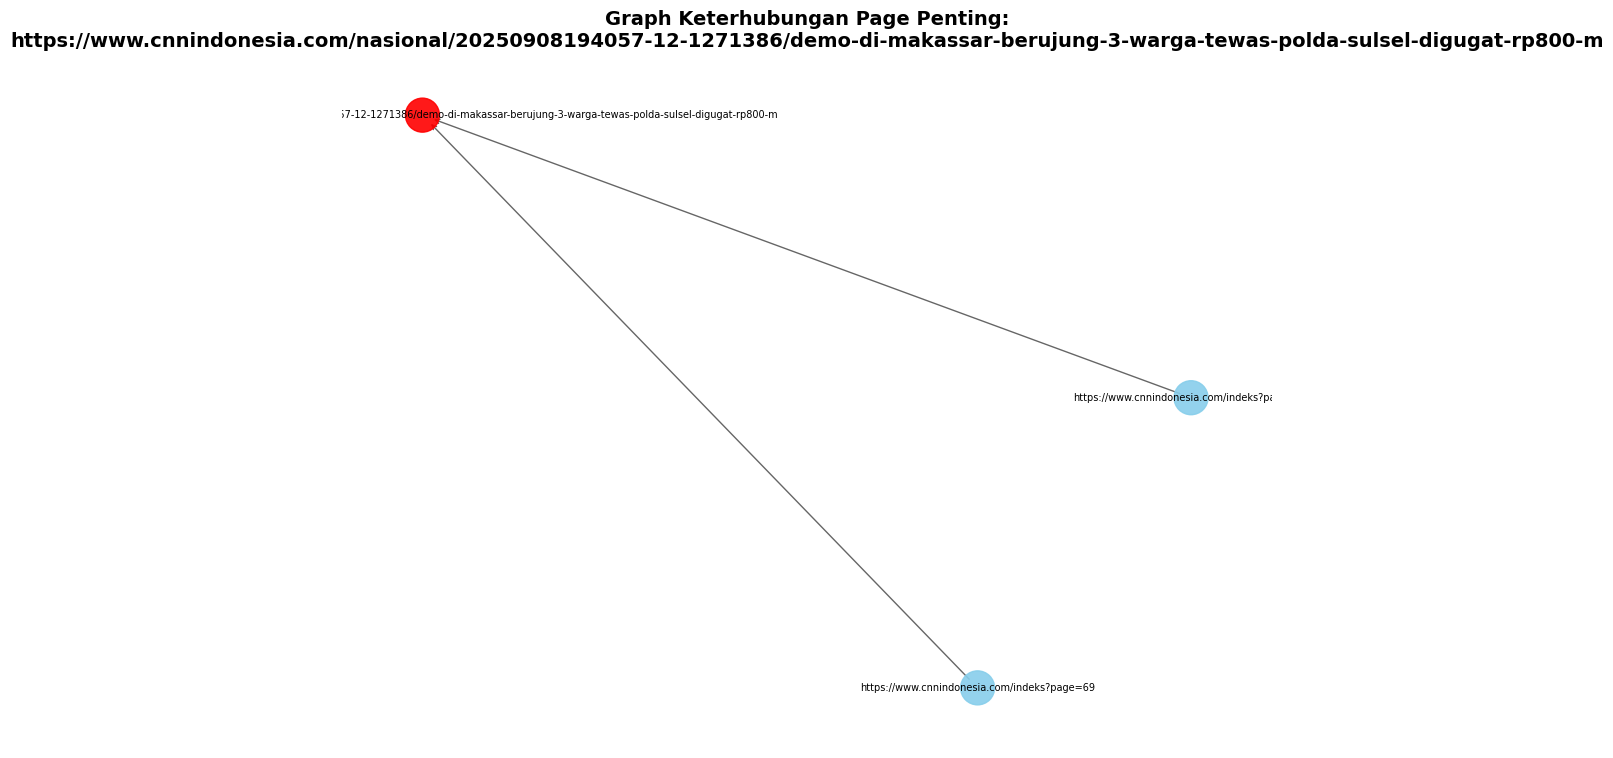

In [17]:
# Visualisasi Graph
plt.figure(figsize=(12, 9))
plt.title(f"Graph Keterhubungan Page Penting:\n{page_penting}", fontsize=14, fontweight='bold')

pos = nx.spring_layout(subgraph_page_terhubung, seed=42, k=0.3)
warna_page = ['red' if page == page_penting else 'skyblue' for page in subgraph_page_terhubung.nodes()]

nx.draw_networkx_nodes(subgraph_page_terhubung, pos, node_color=warna_page, node_size=600, alpha=0.9)
nx.draw_networkx_edges(subgraph_page_terhubung, pos, edge_color='black', arrowstyle='->', arrowsize=8, alpha=0.6)
nx.draw_networkx_labels(subgraph_page_terhubung, pos, font_size=7, font_color='black')

plt.axis('off')
plt.show()

In [18]:
# Data Keterhubungan Page Penting
print(f"Jumlah total page yang terhubung dengan page penting: {len(page_terhubung)}")

# DataFrame untuk incoming dan outgoing edges
df_in = pd.DataFrame({
    'page': neighbors_in,
    'link_keluar': [page_penting] * len(neighbors_in)
})
df_out = pd.DataFrame({
    'page': [page_penting] * len(neighbors_out),
    'link_keluar': neighbors_out
})

# gabungkan kedua arah hubungan
data_page_terhubung = pd.concat([df_in, df_out], ignore_index=True)

print(f"Daftar Page yang Terhubung dengan Page Penting:")
display(data_page_terhubung)

Jumlah total page yang terhubung dengan page penting: 3
Daftar Page yang Terhubung dengan Page Penting:


,page,link_keluar
0,https://www.cnnindonesia.com/indeks?page=69,https://www.cnnindonesia.com/nasional/20250908...
1,https://www.cnnindonesia.com/indeks?page=70,https://www.cnnindonesia.com/nasional/20250908...
